# 靈活合併資料的函式concat
concat API ：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html <br>
## 將df1, df2, df3 在index軸的方向上做聯集

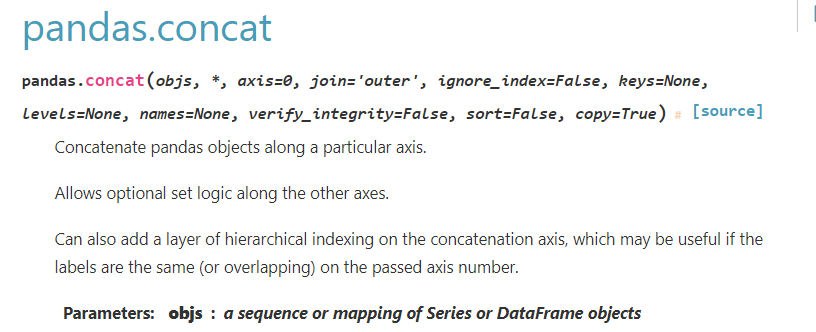

不是一個DataFrame下的物件

In [2]:
import pandas as pd

df1 = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                    'B':['B0', 'B1', 'B2', 'B3'],
                    'C':['C0', 'C1', 'C2', 'C3'],
                    'D':['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6', 'A7'],
                    'B':['B4', 'B5', 'B6', 'B7'],
                    'C':['C4', 'C5', 'C6', 'C7'],
                    'D':['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A':['A8', 'A9', 'A10', 'A11'],
                    'B':['B8', 'B9', 'B10', 'B11'],
                    'C':['C8', 'C9', 'C10', 'C11'],
                    'D':['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


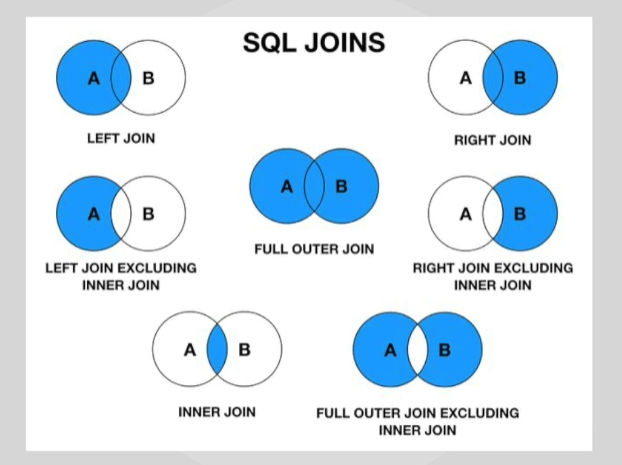
* outer:聯集
* inner:交集

## 將df1, df4 在column軸的方向上做聯集

In [7]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [5]:
df4 = pd.DataFrame({'B':['B2', 'B3', 'B6', 'B7'],
                    'D':['D2', 'D3', 'D6', 'D7'],
                    'F':['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
pd.concat([df1, df4], axis=1, join='outer', sort=False )

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


## 將df1, df4 在column軸的方向上做交集

In [11]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [12]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [6]:
pd.concat([df1, df4], axis=1, join='inner', sort=False)

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


## 將df1, df4 在index軸的方向上做交集

In [13]:
pd.concat([df1, df4], axis=0, join='inner', sort=False)

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


## 群組化索引值
keys=\['次索引值1', '次索引值2', ...\]

In [14]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [15]:
result.loc['y'] # row名稱

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
